**Background**
Walmart es una reconocida corporación minorista que opera una cadena de hipermercados. Walmart ha proporcionado datos que combinan 45 tiendas, incluyendo información de la tienda y ventas mensuales, que se proporcionan semanalmente. Walmart intenta encontrar el impacto de las vacaciones en las ventas de la tienda. Para ello, ha incluido cuatro semanas de vacaciones en el conjunto de datos, que son Navidad, Acción de Gracias, Super Bowl y el Día del Trabajo. Aquí nos encargamos de analizar el conjunto de datos proporcionado. Antes de hacer eso, permítanme señalar el objetivo de este análisis.

**Business Objectives**
Nuestro objetivo principal es predecir las ventas de la tienda en una semana. Dado que se proporcionan datos relacionados con el tamaño del conjunto de datos y el tiempo, se analiza si las ventas se ven afectadas por factores basados en el tiempo y el espacio. Lo más importante es cómo la inclusión de vacaciones en una semana aumenta las ventas en la tienda.

**Tareas de análisis**

Tareas básicas de estadísticas

1) ¿Qué tienda tiene el máximo de ventas?

2) Qué tienda tiene la desviación estándar máxima, es decir, las ventas varían mucho. Además, averigüe el coeficiente de media a desviación estándar

3) ¿Qué tienda/s tiene una buena tasa de crecimiento trimestral en el tercer trimestre de 2012?

4) Algunas festividades tienen un impacto negativo en las ventas. Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada no festiva para todas las tiendas juntas

5) Proporcione una vista mensual y semestral de las ventas en unidades y brinde información

Modelo estadístico

Para la tienda 1: cree modelos de predicción para pronosticar la demanda

Regresión lineal: utilice variables como la fecha y reestructure las fechas como 1 para el 5 de febrero de 2010 (a partir de la fecha más antigua en orden). Haga una hipótesis sobre si el IPC, el desempleo y el precio del combustible tienen algún impacto en las ventas.

Cambie las fechas a días creando una nueva variable.

Seleccione el modelo que ofrezca la mejor precisión.

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Importing Dataset feature
df_feature = pd.read_csv('~/datasets/new/features.csv')
df_feature



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
# Importing Dataset store
df_store = pd.read_csv('~/datasets/new/stores.csv')
df_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
# Importing Dataset train
df_train = pd.read_csv('~/datasets/new/train.csv')
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [6]:
  # Unir los datasets utilizando la columna 'Store' como llave primaria
merged_data = pd.merge(df_train, df_store, on='Store')
merged_data = pd.merge(merged_data, df_feature, on=['Store', 'Date'], how='left')
merged_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**Descripción del conjunto de datos:**

Estos son los datos históricos que abarcan las ventas desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

***Dataset Features:***

*Tienda* - el número de la tienda

*Fecha* - la semana de ventas (los datos se registran el  día viernes)

*Weekly_Sales* - ventas para la tienda dada

*Holiday_Flag*: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva

*Temperatura* - Temperatura el día de la venta

*Fuel_Price* - Costo del combustible en la región durante esa semana

*IPC* – Índice de precios al consumidor vigente durante esa semana

*Desempleo* - Tasa de desempleo durante esa semana en la region de la tienda

*MarkDown1* -  Datos anónimos relacionados con las rebajas promocionales que está realizando Walmart

***Dataset Stores*** contiene información anonimizada sobre las 45 tiendas, indicando el tipo y tamaño de la tienda:

*Store* - Tiendas numeradas del 1 al 45

*Type* - Tipo de tienda, hay 3 tipos: A, B y C

*Size* - El tamaño de las tiendas se calcula segun el numero de productos disponibles en la tienda que va desde 34000 a 210000

***Dataset Train*** Estos son los datos de entrenamiento históricos, que abarcan desde 2010–02–05 hasta 2012–11–01.

*Store* - Numero de tienda

*Dept* - uno de 1 a 99 que muestra el departamento

*Date* - La semana

*Weekly_Sales* - Las ventas registradas durante esa semana

*IsHoliday* - un valor booleano que representa una semana de vacaciones o no

**Eventos festivos:**

*Super Bowl*: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013

*Día del Trabajo*: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13

*Acción de gracias*: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13

*Navidad*: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13

In [7]:
# Dataset informacion
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

En total contamos con 421570 valores de entrenamiento (train).

**Manipulacio de los Datos:**

In [8]:
# Comprobando valores nulos
missings = merged_data.isnull().sum()
missings

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

Las columnas MarkDowns tienen considerables valores faltantes, imputamos ceros en esos lugares faltantes de manera respectiva.

In [9]:
# Imputar ceros en las columnas Markdowns
merged_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

print(merged_data.sample(5))

        Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
107400     11    95  2012-05-18      80235.72        False    A  207499   
335917     35    41  2010-05-21       1279.00        False    B  103681   
402295     43    72  2010-03-05         21.76        False    C   41062   
177625     19     4  2010-04-09      29755.61        False    A  203819   
291711     30    81  2010-06-11      12704.09        False    C   42988   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
107400        72.53       3.630     4622.9        0.0       9.22     479.55   
335917        63.31       2.958        0.0        0.0       0.00       0.00   
402295        52.89       2.625        0.0        0.0       0.00       0.00   
177625        55.66       2.992        0.0        0.0       0.00       0.00   
291711        83.51       2.668        0.0        0.0       0.00       0.00   

        MarkDown5         CPI  Unemployment  IsHoliday_y  
107400    4109.

In [10]:
# Comprobar si Columna IsHoliday_x  y Columna IsHoliday_y  tienen los mismos valores
son_iguales = merged_data['IsHoliday_x'].equals(merged_data['IsHoliday_y'])

print('son_iguales')

son_iguales


Eliminamos la columna 'IsHoliday_y' ya que es igual a la columna 'IsHoliday_x'.

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [12]:
# Eliminar la última columna
merged_data = merged_data.iloc[:, :-1]
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


Cambiamos el tipo de dato de la columna 'date' a todatetime.

In [13]:
# Converting "Data" column to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [15]:
# Diferentes valores de columna 'Store'
print('cantidad de tiendas:' , merged_data['Store'].nunique() )


cantidad de tiendas: 45


In [41]:
# Valores unicos de la tienda y el tipo
print('el valor unico de la tienda es', merged_data['Store'].unique())
print('el valor unico del tipo de tienda es', merged_data['Type'].unique())

el valor unico de la tienda es [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
el valor unico del tipo de tienda es ['A' 'B' 'C']


In [45]:
# Groupby y Estadisticas basicas para tener una pista de como se comportan las ventas en cada tipo de tienda.
agrupando = merged_data.groupby('Type')
print(agrupando.describe()['Size'].round(2)) 

         count       mean       std      min       25%       50%       75%  \
Type                                                                         
A     214961.0  182225.39  41532.66  39690.0  158114.0  202505.0  203819.0   
B     162787.0  101796.84  30944.31  34875.0   93188.0  114533.0  123737.0   
C      42464.0   40536.10   1194.69  39690.0   39690.0   39910.0   41062.0   

           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0  


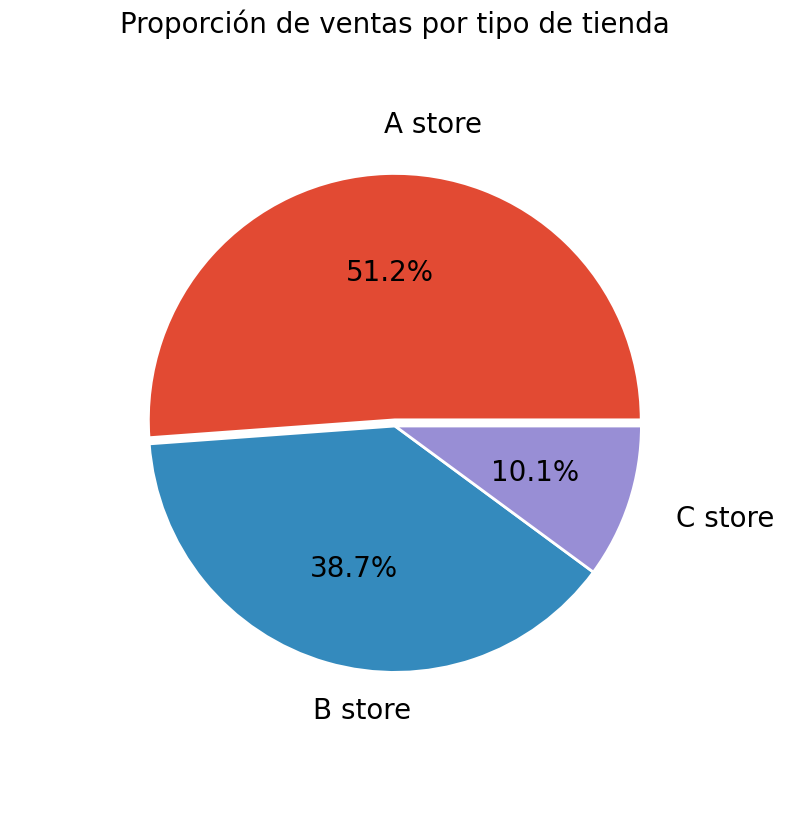

In [54]:
# Graficar la distribucion de las ventas por el tipo de tienda 

# Definiendo el tipo de grafico
plt.style.use('ggplot')

# Definiendo etiquetas 
labels = ['A store', 'B store', 'C store']

# Calculando la proporcion de cada tienda en porcentaje 
sizes = [214961/(162787+42464+214961)*100, 162787/(162787+42464+214961)*100, 42464/(162787+42464+214961)*100]

fig, axes = plt.subplots(1, 1, figsize=(10, 10))

textprops = {'fontsize': 20}

# Creacion de grafico pie y especificacion de propiedades
axes.pie(sizes, labels=labels, explode=(0.02, 0, 0), autopct='%1.1f%%', pctdistance=0.6, labeldistance=1.2, 
         textprops=textprops, wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, radius=0.8, center=(0.5, 0.5))
axes.set_title('Proporción de ventas por tipo de tienda', fontsize=20)

plt.show()


En el anterior grafico podemos observar que el **51.2% de las ventas corresponden a las tiendas tipo A, aproximadamente el 38.7% de las ventas corresponden a las tiendas del tipo B y el 10.1% de las ventas corresponden a las tiendas del tipo C.**

Seguidamente observaremos el tamano de cada tipo de tienda con un diagrama de cajas.

Text(0.5, 1.0, 'Tamaño de las Tiendas por Tipo')

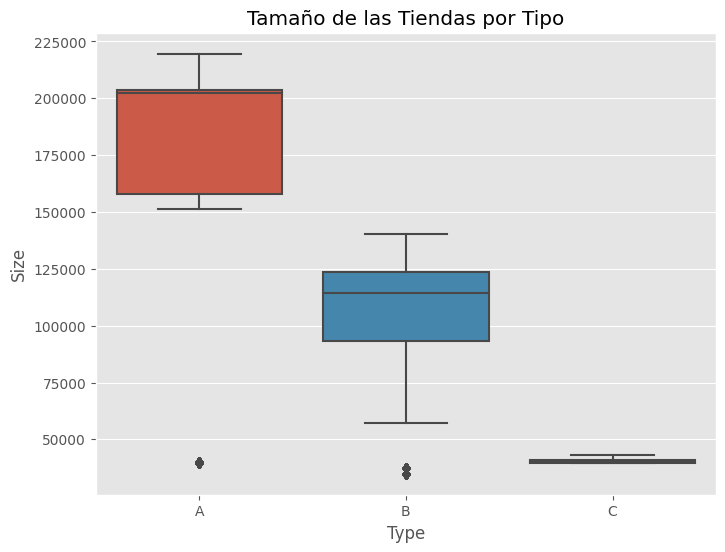

In [63]:
# Visualizacion de la distribucion de las tiendas por tipo.

# Combinar dos columnas en un nuevo dataframe.
tienda_siz = pd.concat([merged_data['Type'], merged_data['Size']], axis=1)

# Crea una figura y conjunto de ejes con un tamano de 8 por 6 pulgadas.
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Type', y='Size', data=tienda_siz)
ax.set_title("Tamaño de las Tiendas por Tipo")


Del grafico de cajas anterior notamos que :
**1. La tienda del tipo A es la mas grande.**
**2. La tienda del tipo C es la mas pequeña**
Los dos anteriores graficos nos dejan como conclusion que **Las Tiendas del tipo A que son las mas grandes registran las mayores ventas semanales.**

Conclusion: El tipo y tamano de tienda son buenas caracteristicas para predecir las ventas.


**Relacion entre Departamento y Ventas semanales:**

In [64]:
# Averiguaremos si los departamentos son caracteristicas que ayudan a predecir las ventas a continuacion

# Cantidad de departamentos
print('cantidad de departamentos:' , merged_data['Dept'].nunique()) 

cantidad de departamentos: 81


A continuacion crearemos un gráfico de dispersión que muestra la relación entre los departamentos, las ventas semanales y si la semana incluye un Holiday.

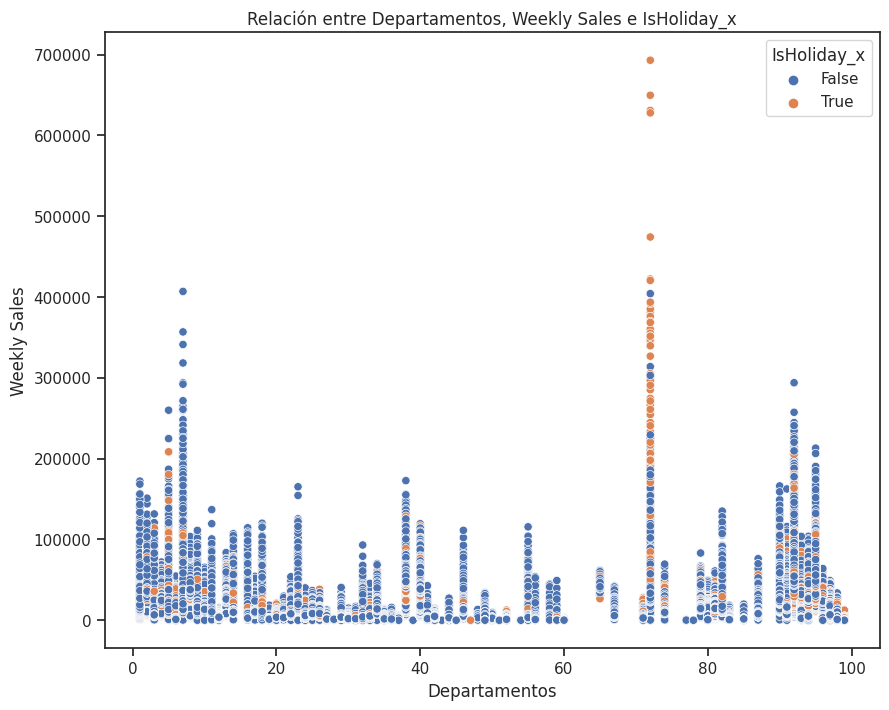

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x="Dept", y="Weekly_Sales", hue="IsHoliday_x", data=merged_data, ax=ax)

ax.set_xlabel("Departamentos")
ax.set_ylabel("Weekly Sales")
ax.set_title("Relación entre Departamentos, Weekly Sales e IsHoliday_x")

plt.show()


In [69]:
import pandas as pd

def dept_max_sales_holiday(df):
    # Filtrar solo las ventas durante los holidays
    holiday_sales = df[df['IsHoliday_x'] == True]

    # Agrupar por departamento y sumar las ventas
    sales_by_dept = holiday_sales.groupby('Dept')['Weekly_Sales'].sum()

    # Obtener el departamento con mayores ventas
    dept_max_sales = sales_by_dept.idxmax()

    # Obtener el valor de las ventas del departamento con mayores ventas
    max_sales = sales_by_dept[dept_max_sales]

    return f"El departamento {dept_max_sales} tiene el mayor número de ventas durante los holidays con un total de ${max_sales:.2f}."

# Ejemplo de uso
print(dept_max_sales_holiday(merged_data))


El departamento 72 tiene el mayor número de ventas durante los holidays con un total de $40314400.37.


De acuerdo al grafico de dispersion y apoyandonos con una funcion observamos que el departamento 72 muestra el mayor aumento de ventas durante 'Holidays'  Sin embargo, otros no lo hacen y aún más en algunos departamentos las ventas no navideñas son más altas. Eso significa que el carácter del producto (departamento) tiene una relación diferente con las ventas. 

En un analisis mas profundo por tiendas y departamentos, realizo un pivot table para visualizar algun valor fuera de lo comun.

In [17]:
def tabla_pivote(merged_data):
    """Función que crea una tabla pivote para las columnas 'Store' y 'Dept' del dataframe 'merged_data'"""
    pivote = pd.pivot_table(merged_data, values='Weekly_Sales', index='Store', columns='Dept')
    return pivote


In [18]:
tabla_pivote = tabla_pivote(merged_data)
print(tabla_pivote)


Dept             1              2             3             4             5   \
Store                                                                          
1      22513.322937   46102.090420  13150.478042  36964.154476  24257.941119   
2      30777.980769   65912.922517  17476.563357  45607.666573  30555.315315   
3       7328.621049   16841.775664   5509.300769   8434.186503  11695.366573   
4      36979.940070   93639.315385  19012.491678  56603.400140  45668.406783   
5       9774.553077   12317.953287   4101.085175   9860.806783   6699.202238   
6      23867.553776   50269.437273  16806.638811  34187.366503  34465.307622   
7       9542.801259   22603.690769   8633.536923  14950.518601  13860.350490   
8      14789.827343   35729.821748  10683.305105  21089.309301  19838.849231   
9      11846.558252   24969.477413   7497.356783  17165.947762  19282.746014   
10     39925.138951  109795.291469  32086.181469  48579.826364  58373.460280   
11     18860.911958   57114.326224  1762

Observamos que los "Store" empiezan en 1 y van hasta 45, el numero de 'Dept" van desde 1 hasta 99 pero hay algunos numeros faltantes como el 88, 89, etc. En total tenemos 81 numeros de 'Dept".

In [19]:
def buscar_valores_negativos_tabla_pivote(tabla_pivote):
    """Función que busca valores menores a cero en una tabla pivote"""
    negativos = tabla_pivote[tabla_pivote < 0].dropna(how='all').dropna(axis=1, how='all')
    if negativos.empty:
        print("No se encontraron valores negativos en la tabla pivote")
    else:
        print("Valores negativos encontrados en la tabla pivote:\n", negativos)


In [20]:
buscar_valores_negativos_tabla_pivote(tabla_pivote)


Valores negativos encontrados en la tabla pivote:
 Dept         19        33    34    36   37   41          47     48         55  \
Store                                                                           
1           NaN       NaN   NaN   NaN  NaN  NaN -116.454545    NaN        NaN   
6           NaN       NaN   NaN   NaN  NaN  NaN  -42.023333    NaN        NaN   
7           NaN       NaN   NaN   NaN  NaN  NaN   -9.906250    NaN        NaN   
9           NaN       NaN   NaN   NaN  NaN  NaN   -3.070000    NaN        NaN   
10          NaN       NaN   NaN   NaN  NaN  NaN  -64.694444    NaN        NaN   
12          NaN       NaN   NaN   NaN  NaN  NaN  -43.899091    NaN        NaN   
14          NaN       NaN   NaN   NaN  NaN  NaN   -7.777917    NaN        NaN   
15          NaN       NaN   NaN   NaN -2.5  NaN         NaN    NaN        NaN   
16          NaN       NaN   NaN   NaN  NaN  NaN  -57.726667    NaN        NaN   
19    -5.219231       NaN   NaN   NaN  NaN  NaN         Na

Observamos algunos valores cero o negativos en la tabla pivote correspondientes a "Weekly_Sales", los montos de las ventas semanales pueden ser negativos ya que pueden corresponder a devoluciones, en cuanto a los valores cero lo que demuestra que ese departamento no registro ventas en esa semana.

Realizamos una matrix de correlacion para observar relacion entre las variables del dataframe y obtener un mejor analisis.

/tmp/ipykernel_381/1903670280.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_data.corr()


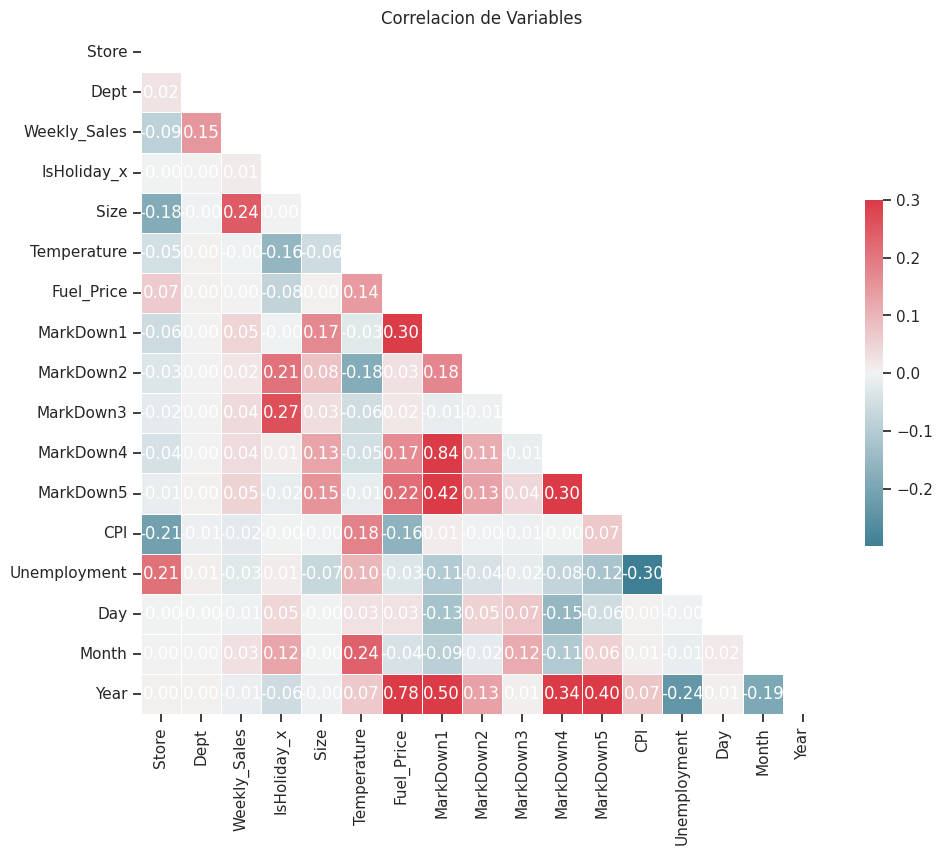

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = merged_data.corr()

# Generando mascara
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# configurando matplot
f, ax = plt.subplots(figsize=(11, 9))

# configuracion de colores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibujando el heatmap 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Anadir numeros de correlacion
for i in range(len(corr)):
    for j in range(len(corr)):
        if i != j:
            ax.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}",
                    ha="center", va="center", color="w")
plt.title('Correlacion de Variables')
plt.show()


**Correlaciones entre características:**
La correlación es un análisis bivariado que mide la fuerza de la asociación entre dos variables y la dirección de la relación. En cuanto a la fuerza de la relación, el valor del coeficiente de correlación varía entre +1 y -1.

Un valor de ± 1 indica un perfecto grado de asociación entre las dos variables. A medida que el valor del coeficiente de correlación se acerque a 0, la relación entre las dos variables será más débil. La dirección de la relación está indicada por el signo del coeficiente; un signo + indica una relación positiva y un signo — indica una relación negativa. Por lo general, en estadística, medimos cuatro tipos de correlaciones: correlación de Pearson, correlación de rango de Kendall y correlación de Spearman. 

Se aprecia en la tabla de correlacion que un mayor desempleo indica indice de precios al consumidor(CPI) mas bajo, los descuentos estan correlacionados y de manera mas interesante   a demas observamos que las tiendas mas grandes generan mas ventas,*** los descuentos generan valores de venta mas altos y un mayor desempleo trae como resultado disminucion en las ventas. Desafortunadamente parece haber poca relacion entre las vacaciones, las temperaturas o los precios de combustible con las ventas semanales.***

Otro punto de vista: El mapa de calor (heatmap) muestra la matriz de correlación de los datos de Walmart Sales Forecasting en forma visual. La intensidad del color en cada celda representa el grado de correlación entre dos variables. Las celdas con colores más claros indican una correlación positiva más fuerte, mientras que las celdas con colores más oscuros indican una correlación negativa más fuerte.

En este caso, la matriz de correlación muestra que la variable más correlacionada con los valores de venta es la variable "Precio", con una correlación positiva fuerte. Esto sugiere que los precios más altos tienden a estar asociados con ventas más altas. También podemos ver que hay una correlación negativa moderada entre los valores de venta y la variable "Descuentos", lo que sugiere que los descuentos más altos pueden estar asociados con ventas más bajas.

Además, la matriz de correlación también muestra correlaciones entre otras variables. Por ejemplo, podemos ver una correlación positiva moderada entre las variables "Cajas vendidas" y "Valores de venta". Esto sugiere que el número de cajas vendidas está relacionado con los valores de venta. También podemos ver que hay una correlación positiva moderada entre las variables "Cajas vendidas" y "Descuentos", lo que sugiere que los descuentos pueden estar relacionados con el número de cajas vendidas.

Es importante tener en cuenta que la correlación no indica causalidad. Es posible que dos variables estén correlacionadas, pero no haya una relación causal entre ellas. Por lo tanto, es importante utilizar la correlación como una herramienta para explorar la relación entre variables, pero también es importante realizar un análisis más profundo para entender las relaciones causales entre las variables.

Podemos representar de manera grafica algunas de las relaciones anteriores para analizar mas a fondo.

****EDA****

***1) ¿Qué tienda tiene el máximo de ventas?***

In [25]:
# Agrupar por tienda y sumar las ventas
sales_by_store = merged_data.groupby("Store")[["Weekly_Sales"]].sum()

# Ordenar las ventas de forma descendente
sales_by_store = sales_by_store.sort_values(by="Weekly_Sales", ascending=False)

sales_by_store

,Weekly_Sales
Store,
20,3.014014e+08
4,2.995453e+08
14,2.890019e+08
13,2.865180e+08
2,2.753872e+08
10,2.716241e+08
27,2.538572e+08
6,2.237586e+08
1,2.224068e+08


In [26]:
# Mostrar la tienda con más ventas
print("La tienda con más ventas es la número:", sales_by_store.index[0])

La tienda con más ventas es la número: 20


La tienda con más ventas es la número: 20


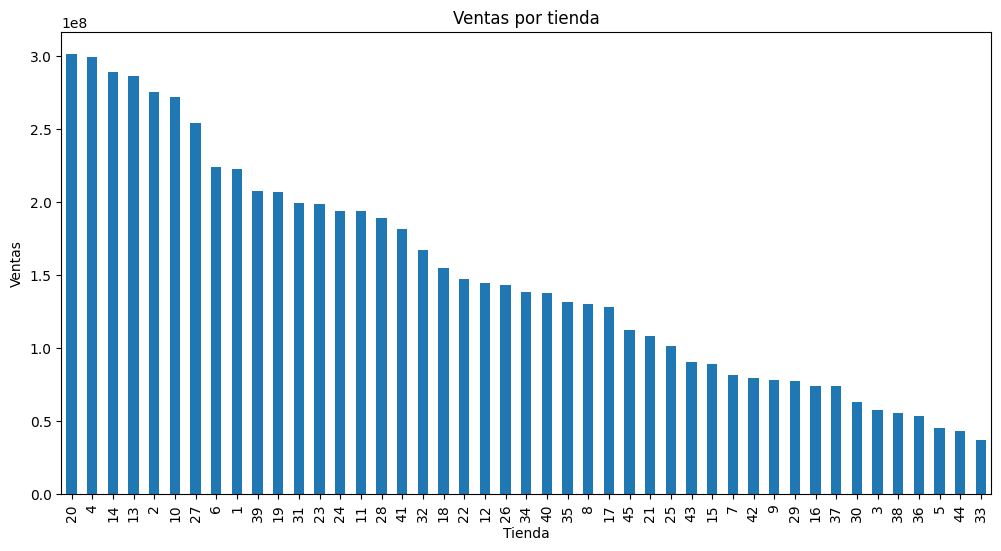

In [27]:
# visualizar de manera grafica el resultado
sales_by_store.plot(kind="bar", figsize=(12,6), legend=None)
plt.title("Ventas por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ventas")

# Mostrar la tienda con más ventas
print("La tienda con más ventas es la número:", sales_by_store.index[0])

# Mostrar el gráfico
plt.show()

**2) Qué tienda tiene la desviación estándar máxima, es decir, las ventas varían mucho. Además, averigüe el coeficiente de desviación medio**

In [28]:
# Agrupar por tienda y calcular la desviación estándar y la media
sales_std_mean = merged_data.groupby("Store")[["Weekly_Sales"]].agg(['std', 'mean'])

# Calcular el coeficiente de desviación para cada tienda
sales_std_mean["coef_of_var"] = sales_std_mean[("Weekly_Sales", "std")] / sales_std_mean[("Weekly_Sales", "mean")]

# Ordenar las tiendas por coeficiente de desviación de forma descendente
sales_std_mean = sales_std_mean.sort_values(by="coef_of_var", ascending=False)

# Mostrar la tienda con mayor coeficiente de desviación
print("La tienda con mayor coeficiente de desviación es la número:", sales_std_mean.index[0])

# Calcular el coeficiente de desviación medio para todas las tiendas
coef_of_var_mean = sales_std_mean["coef_of_var"].mean()

# Mostrar el coeficiente de desviación medio
print("El coeficiente de desviación medio es:", coef_of_var_mean)

La tienda con mayor coeficiente de desviación es la número: 3
El coeficiente de desviación medio es: 1.3261546142452774


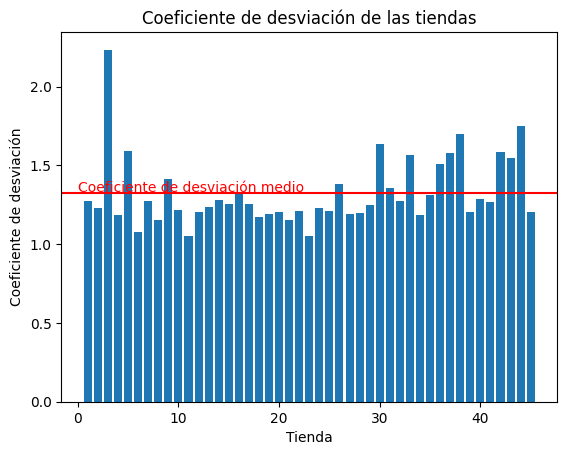

In [29]:
# Crear un gráfico de barras para mostrar el coeficiente de desviación de cada tienda
plt.bar(sales_std_mean.index, sales_std_mean["coef_of_var"])

# Añadir un título al gráfico
plt.title("Coeficiente de desviación de las tiendas")

# Añadir etiquetas a los ejes
plt.xlabel("Tienda")
plt.ylabel("Coeficiente de desviación")

# Añadir una línea horizontal para el coeficiente de desviación medio
plt.axhline(y=coef_of_var_mean, color='r', linestyle='-')
plt.text(0, coef_of_var_mean + 0.005, "Coeficiente de desviación medio", color='r')

# Mostrar el gráfico
plt.show()


Este gráfico permite identificar las tiendas que tienen una mayor variabilidad en sus ventas semanales como la tienda 3 lo que significa que sus ventas semanales varian significativamente tambien observamos que la mayoria de las tiendas tienen un coeficiente de desviacion por debajo de l promedio indicando que las ventas semanales varian en menor medida en relacion a la media, lo que puede ser útil para tomar decisiones en cuanto a estrategias de marketing y gestión de inventario.

**3) ¿Qué tienda/s tiene una buena tasa de crecimiento trimestral en el tercer trimestre de 2012?**

In [30]:
# Splitting la columna dato en columna 'day', 'month', 'year'
merged_data["Day"]= pd.DatetimeIndex(merged_data['Date']).day
merged_data['Month'] = pd.DatetimeIndex(merged_data['Date']).month
merged_data['Year'] = pd.DatetimeIndex(merged_data['Date']).year
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,12,2,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,19,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,26,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,28,9,2012
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,5,10,2012
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,12,10,2012
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,19,10,2012


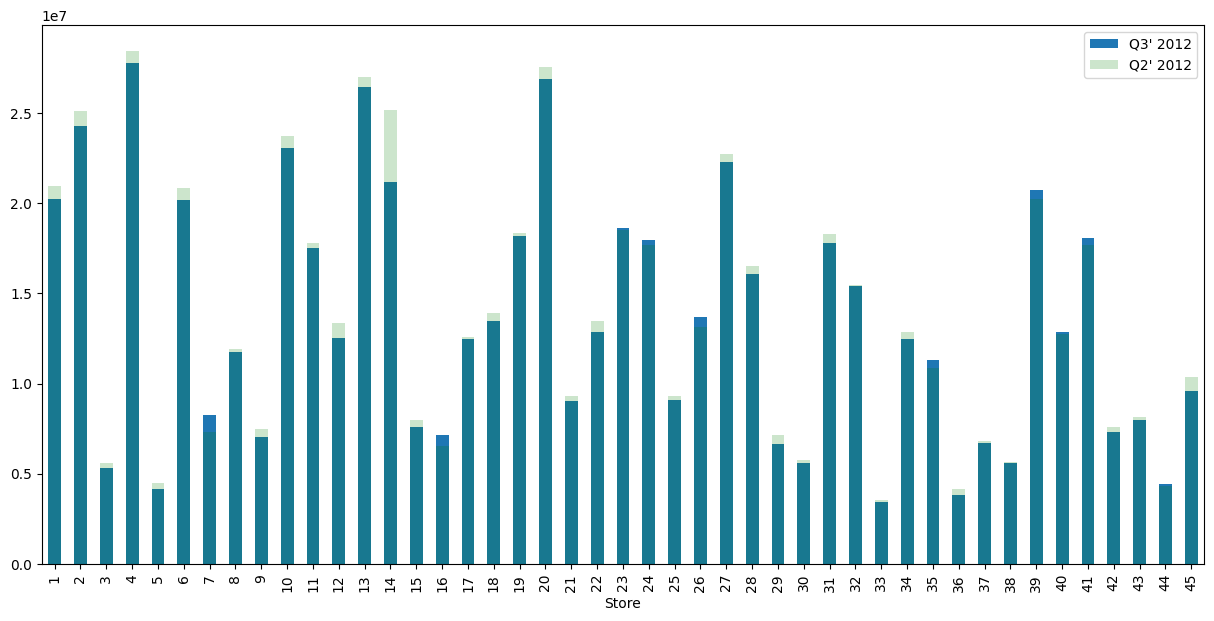

In [31]:
# ventas para el 2do y 3er trimestre in 2012
q_2_sales = merged_data[(merged_data['Date'] >= '2012-04-01') & (merged_data['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
q_3_sales= merged_data[(merged_data['Date'] >= '2012-07-01') & (merged_data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
plt.figure(figsize=(15,7))
q_2_sales.plot(ax=q_3_sales.plot(kind ='bar'),kind='bar',color='g',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

En el anterior grafico observamos que la tienda 4 tuvo el mejor crecimiento trimestral para el tercer trimestre del 2012.

**4) Algunas festividades tienen un impacto negativo en las ventas. Averigüe los días festivos que tienen ventas más altas que las ventas medias en temporada no festiva para todas las tiendas juntas**


***Fechas de dias festivos***

Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']

Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']

Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']

Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [32]:


# Filtrar por días festivos
holiday_sales = merged_data.loc[merged_data['IsHoliday_x'] == True]

# Agrupar por fecha y calcular la venta semanal total
holiday_sales_total = holiday_sales.groupby(['Store', 'Date'])['Weekly_Sales'].sum()

# Ordenar las ventas de mayor a menor
holiday_sales_total_sorted = holiday_sales_total.sort_values(ascending=False)

# Imprimir las 5 fechas de días festivos con las ventas más altas
print(holiday_sales_total_sorted.head())


Store  Date      
4      2011-11-25    3004702.33
10     2011-11-25    2950198.64
       2010-11-26    2939946.38
14     2010-11-26    2921709.71
20     2011-11-25    2906255.28
Name: Weekly_Sales, dtype: float64


De lo anterior tenemos una pista de el dia festivo que registro mas ventas es el 'Thanksgiving' en las tiendas 4, 10, 14 y 20.

In [33]:
#calculamos la media de ventas en dias festivos
def holiday_sales_mean(merged_data):
    # Filtrar por datos de días festivos (IsHoliday = True)
    holiday_sales = merged_data.loc[merged_data['IsHoliday_x'] == True]
    # Calcular la venta semanal promedio en días festivos
    holiday_sales_mean = holiday_sales.groupby(['Date'])['Weekly_Sales'].mean()
    return holiday_sales_mean.mean()


In [34]:
print("Media de ventas en días festivos: ", holiday_sales_mean(merged_data))


Media de ventas en días festivos:  17084.72495517679


In [35]:
# Obtenemos dataframe con medias por tienda y departamento 
medians = pd.DataFrame({'Median Sales': merged_data.loc[merged_data['IsHoliday_x'] == True].groupby(by=['Type', 'Dept', 'Store', 'Month'])['Weekly_Sales'].median()}).reset_index().sort_values('Median Sales', ascending=False)
medians.head(10)



,Type,Dept,Store,Month,Median Sales
9832,B,72,10,11,662049.275
9876,B,72,35,11,638866.555
4606,A,72,14,11,425139.205
4614,A,72,20,11,407164.635
4626,A,72,27,11,394535.380
4586,A,72,4,11,383061.575
9860,B,72,22,11,369618.715
9836,B,72,12,11,360068.130
9864,B,72,23,11,358755.530
4630,A,72,28,11,353560.050


De la anterior tabla observamos en orden de mayor a menor la media por mes si fueron mes con fecha festiva, confirmando que las medias mas altas en ventas fueron en el mes de Thanks giving , lo cual indica que son las 'holidays' que afectan de manera positiva las ventas, tambien se puede considerar la posibilidad de que en ese mes se celebra el black friday tambien otra festividad con sales que deberia registrar un alta en las ventas.

In [36]:
# Calculamos la media de los dias no festivos

# Filtrar las filas con 'IsHoliday' = 0
non_holiday_sales = merged_data.loc[merged_data['IsHoliday_x'] == False]

# Calculando la media de 'non_holiday_dales'
mean_non_holiday_sales = non_holiday_sales['Weekly_Sales'].mean()

print("Mean of non-holiday sales:", mean_non_holiday_sales)

Mean of non-holiday sales: 15952.816351944955


**5. Proporcione una vista mensual y semestral de las ventas en unidades y brinde información o comentarios de la gráfica**

In [37]:
merged_data['Semester'] = merged_data['Month'].apply(lambda x: 'First Semester' if x <= 6 else 'Second Semester')


Text(0.5, 1.0, 'Ventas semestrales')

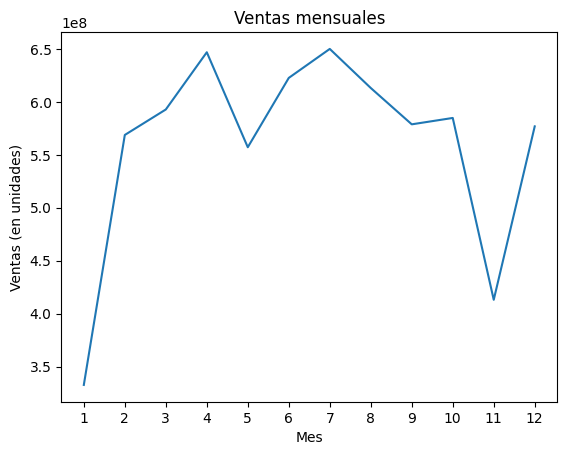

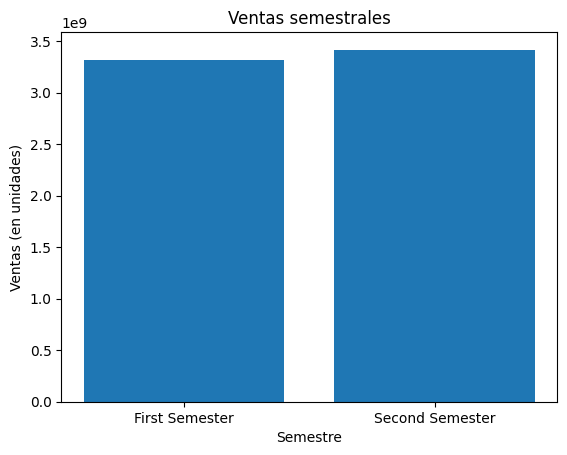

In [38]:
# Agregar columna Semester
merged_data['Semester'] = merged_data['Month'].apply(lambda x: 'First Semester' if x <= 6 else 'Second Semester')

# Agrupar por mes y sumar las ventas en unidades correspondientes
monthly_sales = merged_data.groupby(['Month'])['Weekly_Sales'].sum()
semesterly_sales = merged_data.groupby(['Semester'])['Weekly_Sales'].sum()

# Crear figura y ejes para la gráfica mensual
fig, ax = plt.subplots()
ax.plot(monthly_sales.index, monthly_sales.values)
ax.set_xticks(range(1,13))
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas (en unidades)')
ax.set_title('Ventas mensuales')

# Crear figura y ejes para la gráfica semestral
fig, ax = plt.subplots()
ax.bar(semesterly_sales.index, semesterly_sales.values)
ax.set_xlabel('Semestre')
ax.set_ylabel('Ventas (en unidades)')
ax.set_title('Ventas semestrales')


**nota** observar a fondo las graficas ya que se observa una anomalia para el mes 11 dodnde supone las ventas deberian ser mayores en unidades para la grafica 1.